# 引入必要库

In [236]:
# 引入必要库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备

In [237]:
df_application_record = pd.read_csv("application_record.csv")
df_credit_record = pd.read_csv("credit_record.csv")

print(df_application_record.info())
print(df_application_record.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [238]:
# 丢弃重复ID数据
df_application_record = df_application_record.drop_duplicates(subset = 'ID', keep = False)
print(df_application_record.info())

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL           4

In [239]:
print(df_credit_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


In [240]:
# 显示数据框中能够处理的唯一ID的数量
print("在两个数据集之间一致的唯一ID的数量:", df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]['ID'].nunique())

# 调整数据框，以便仅使用一致的ID进行处理
df_application_record = df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]
df_credit_record = df_credit_record[df_credit_record['ID'].isin(df_application_record['ID'])]
print("application_record中的新ID数量:", df_application_record['ID'].nunique())
print("credit_record中的新ID数量:", df_credit_record['ID'].nunique())

在两个数据集之间一致的唯一ID的数量: 36457
application_record中的新ID数量: 36457
credit_record中的新ID数量: 36457


# 数据清洗

STATUS
C    329536
0    290654
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64
APPROVED
1    620190
0     11575
Name: count, dtype: int64


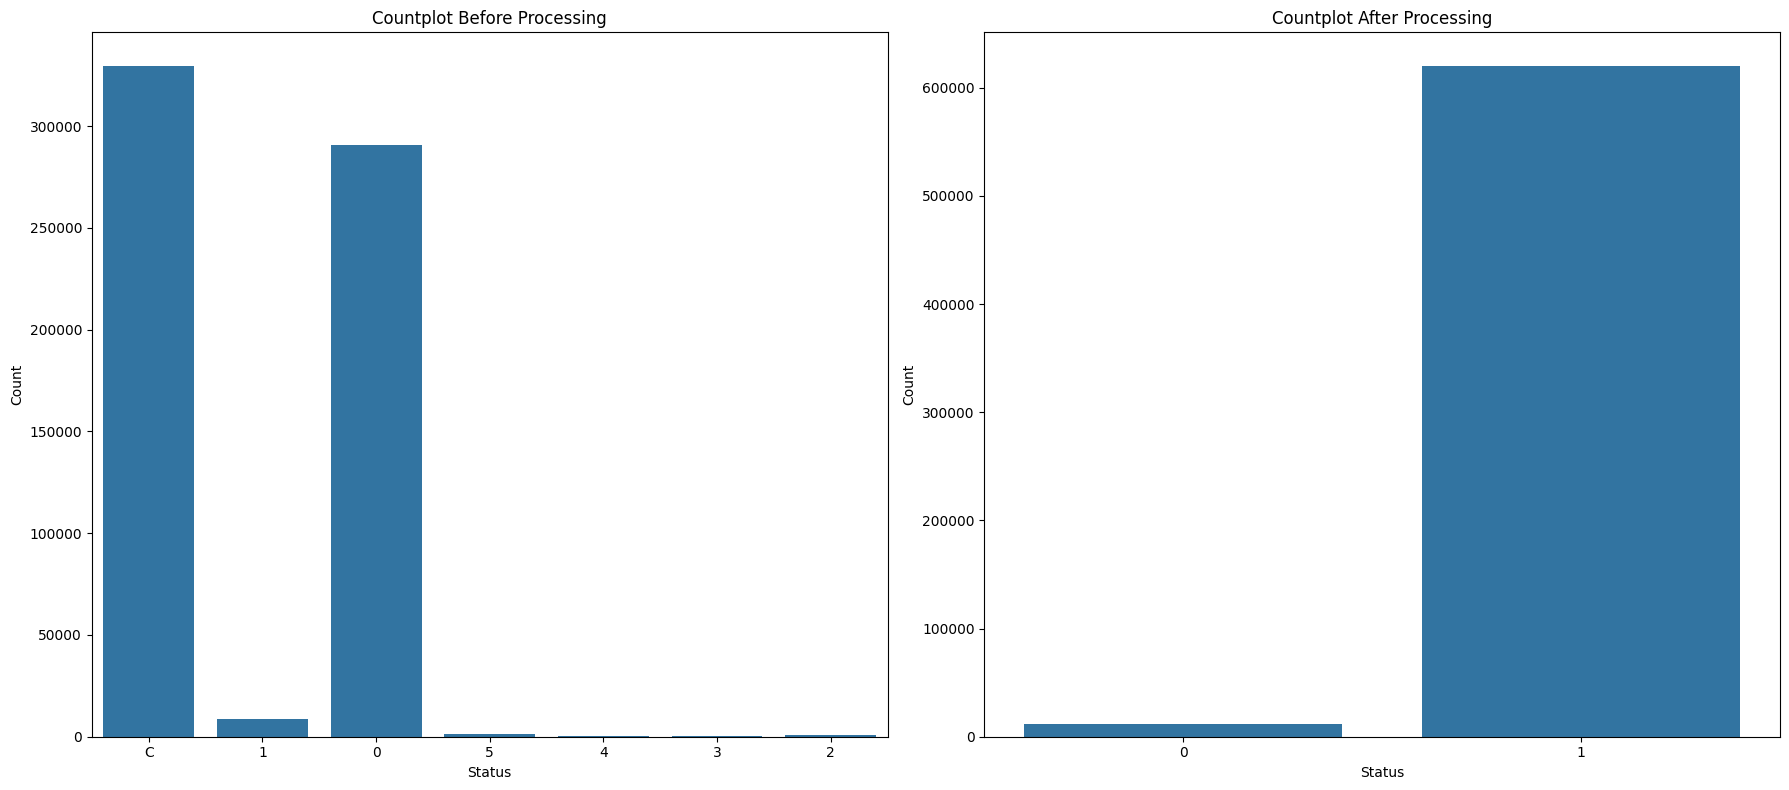

In [250]:
# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# 绘制柱状图（处理前）
sns.countplot(x='STATUS', data=df_credit_record, ax=axes[0])
axes[0].set_title('Countplot Before Processing')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
print(df_credit_record['STATUS'].value_counts())

# 生成标签用于柱状图
label_dict = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, 'X': -1, 'C': 1, '0': 1}
df_credit_record['APPROVED'] = df_credit_record['STATUS'].map(label_dict)
df_credit_record = df_credit_record[df_credit_record['APPROVED'] != -1]

# 绘制柱状图（处理后）
sns.countplot(x='APPROVED', data=df_credit_record, ax=axes[1])
axes[1].set_title('Countplot After Processing')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')
print(df_credit_record['APPROVED'].value_counts())

# 调整布局
plt.tight_layout()
plt.show()

In [242]:
# 合并数据
df_application_record = df_application_record.merge(df_credit_record, on='ID')
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,1


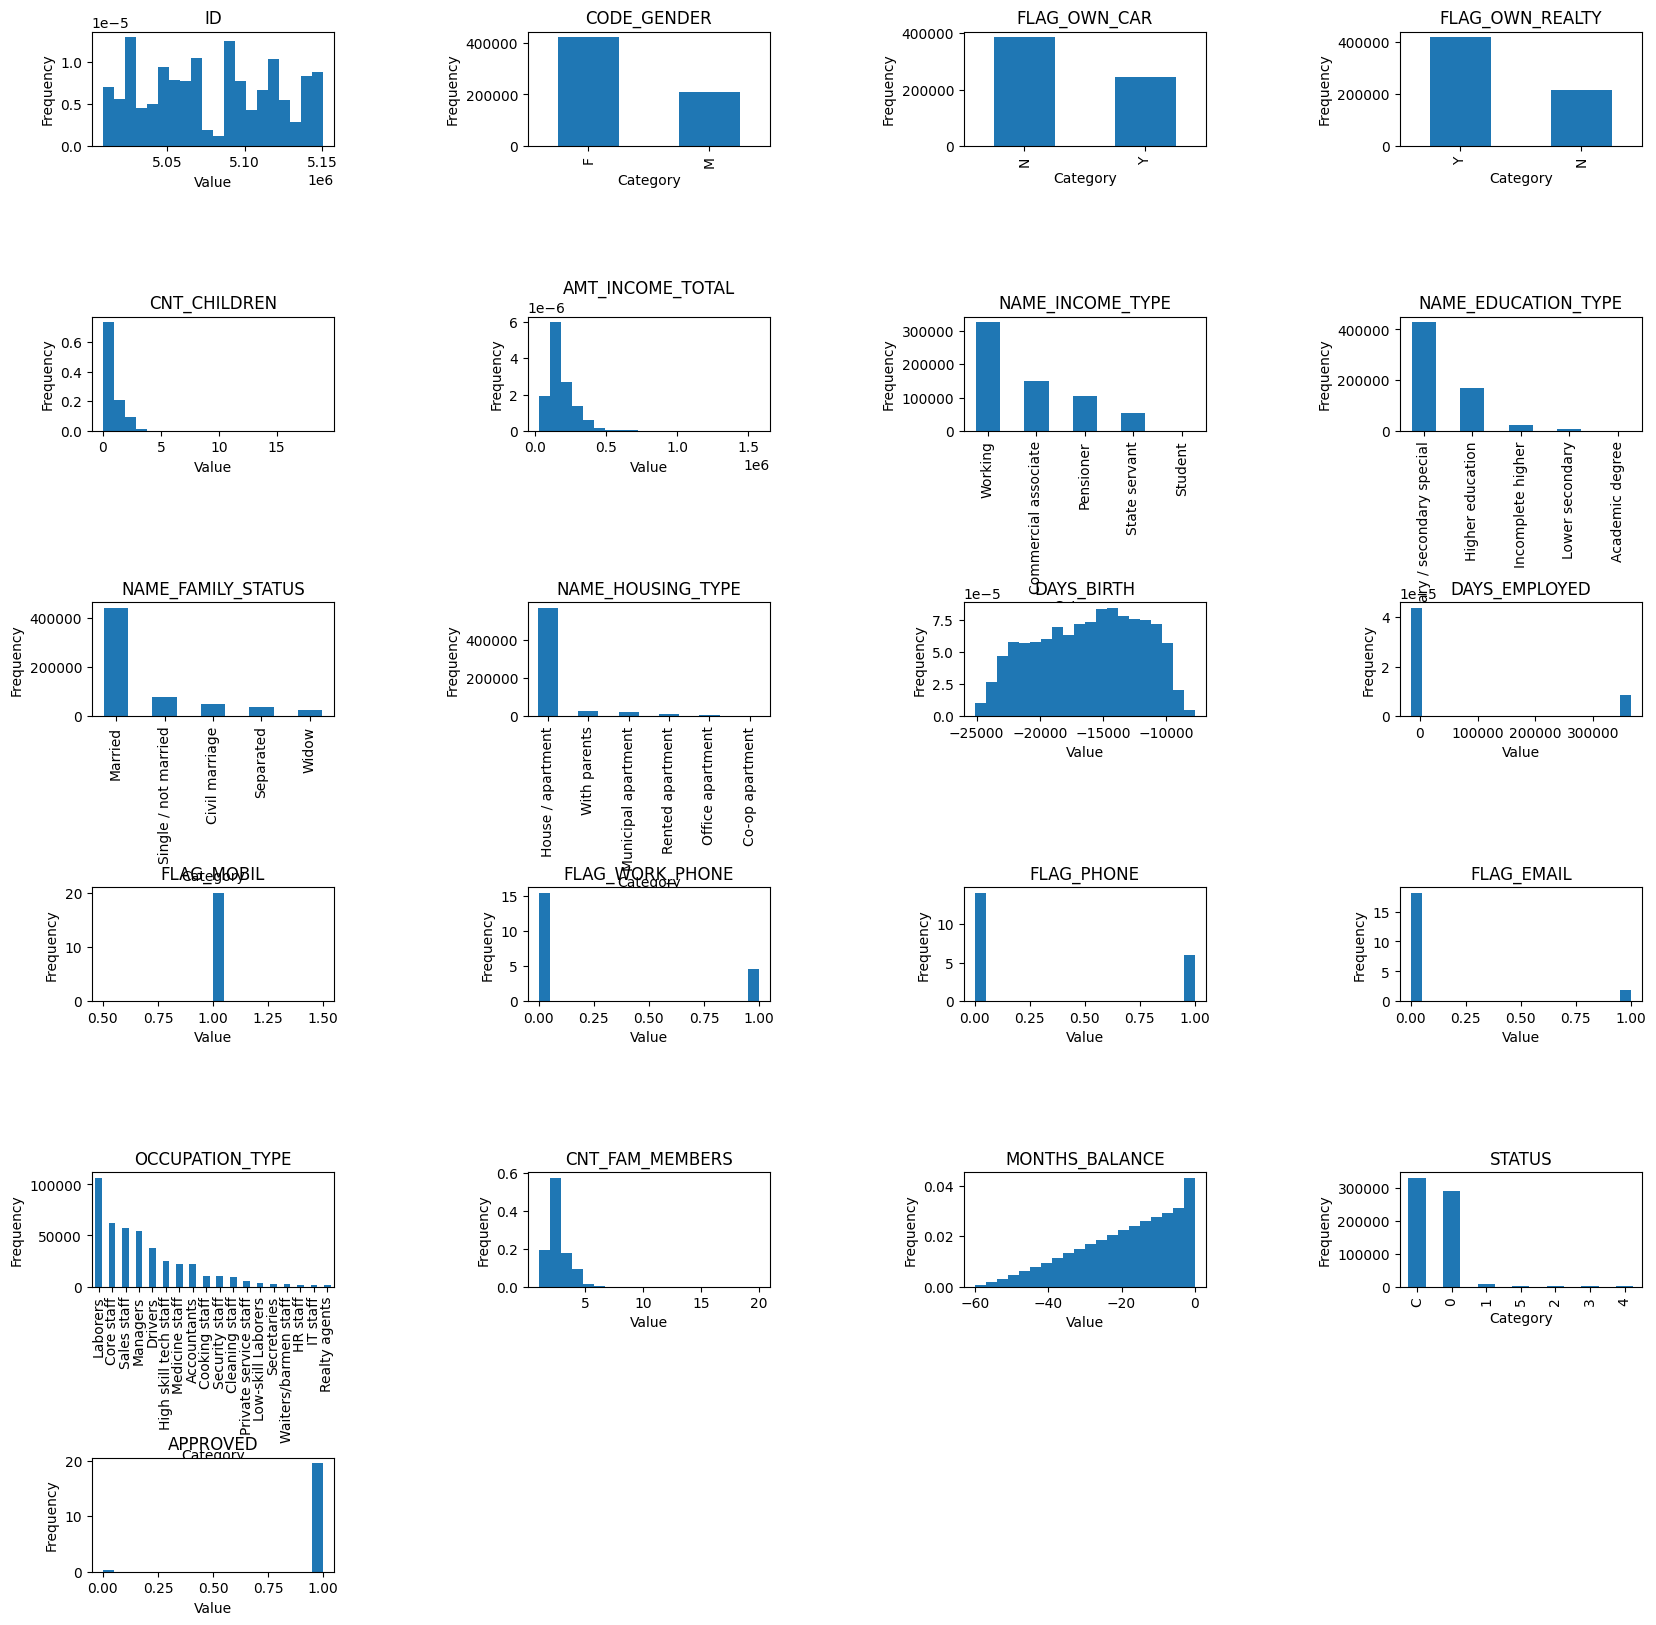

In [243]:
# 获取数据框中所有列的列名和数据类型
columns = df_application_record.columns
dtypes = df_application_record.dtypes

# 计算子图的行数和列数
num_rows = len(columns) // 4  # 4列
num_cols = 4

# 计算所需的子图数量
num_subplots = len(columns) if len(columns) % num_cols == 0 else (num_rows + 1) * num_cols

# 创建一个包含多个子图的画布
fig, axes = plt.subplots(num_rows + 1, num_cols, figsize=(20, 20))
fig.subplots_adjust(wspace=0.8, hspace=1.5)  # 调整子图之间的垂直间隔

# 扁平化子图数组，以便更容易循环访问
axes = axes.flatten()

# 循环遍历每一列，并根据数据类型选择绘图类型
for i, column in enumerate(columns):
    ax = axes[i]
    
    if pd.api.types.is_numeric_dtype(dtypes[column]):
        # 如果是数值数据，绘制直方图
        df_application_record[column].plot(kind='hist', bins=20, density=True, ax=ax)
        ax.set_xlabel('Value')
    else:
        # 如果是非数值数据，绘制条形图
        df_application_record[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel('Category')
    
    ax.set_title(column)
    ax.set_ylabel('Frequency')

# 隐藏多余的子图
for i in range(len(columns), num_subplots):
    axes[i].axis('off')

plt.show()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
APPROVED               0
dtype: int64


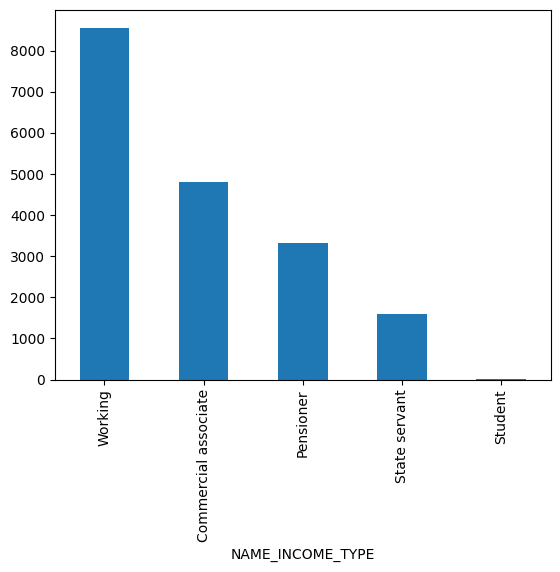

In [244]:
df_application_record = df_application_record[df_application_record['MONTHS_BALANCE']==-4]
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pension"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Commercial associate","OCCUPATION_TYPE"] = "Commercial associate"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="State servant","OCCUPATION_TYPE"] = "State servant"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Student","OCCUPATION_TYPE"] = "Student"
df_application_record = df_application_record.dropna()
print(df_application_record.isna().sum())
df_application_record['NAME_INCOME_TYPE'].value_counts(dropna=False).plot(kind='bar')
# 显示图形
plt.show()

          ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
33   5008806           M            Y               Y             0   
49   5008810           F            N               Y             0   
70   5008811           F            N               Y             0   
145  5008815           M            Y               Y             0   
148  5112956           M            Y               Y             0   

     AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
33           112500.0               Working  Secondary / secondary special   
49           270000.0  Commercial associate  Secondary / secondary special   
70           270000.0  Commercial associate  Secondary / secondary special   
145          270000.0               Working               Higher education   
148          270000.0               Working               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  FLAG_MOBIL  \
33                Married  House

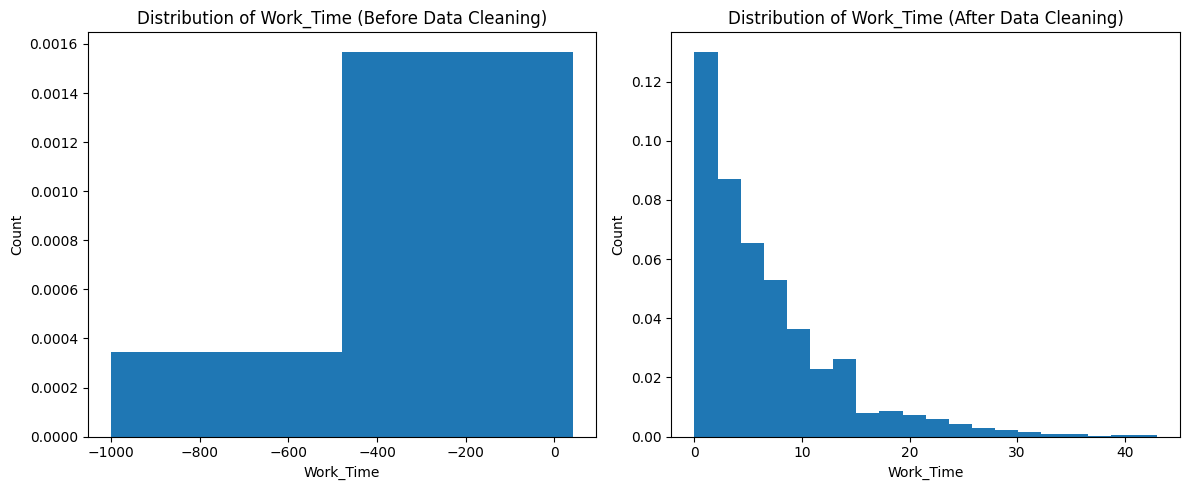

In [245]:
df_application_record['Work_Time'] = -(df_application_record['DAYS_EMPLOYED'])//365

# 设置子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 绘制第一个直方图
df_application_record['Work_Time'].plot(kind='hist', bins=2, density=True, ax=axes[0])
axes[0].set_title('Distribution of Work_Time (Before Data Cleaning)')
axes[0].set_xlabel('Work_Time')
axes[0].set_ylabel('Count')

df_application_record = df_application_record.drop(df_application_record[df_application_record['Work_Time']>50].index)
df_application_record = df_application_record.drop(df_application_record[df_application_record['Work_Time']<0].index)
df_application_record = df_application_record.drop(columns=['STATUS'])
df_application_record.drop(['DAYS_EMPLOYED'],axis=1,inplace=True)
print(df_application_record.head())

# 绘制第二个直方图
df_application_record['Work_Time'].plot(kind='hist', bins=20, density=True, ax=axes[1])
axes[1].set_title('Distribution of Work_Time (After Data Cleaning)')
axes[1].set_xlabel('Work_Time')
axes[1].set_ylabel('Count')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [246]:
baseline_date = pd.to_datetime('2023-01-01')
df_application_record['BIRTH_DATE'] = baseline_date + pd.to_timedelta(df_application_record['DAYS_BIRTH'], unit='D')
df_application_record['AGE'] = (baseline_date - df_application_record['BIRTH_DATE']).dt.days // 365
df_application_record = df_application_record.drop(columns=['DAYS_BIRTH','BIRTH_DATE'])
print(df_application_record.isna().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
APPROVED               0
Work_Time              0
AGE                    0
dtype: int64


In [247]:
onehot = True
if onehot:
    categorical_columns = ['CODE_GENDER', 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
    dummy_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
else:
    categorical_columns = ['CODE_GENDER', 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
    dummy_columns = []
categorical_df = df_application_record[categorical_columns]
categorical_df = categorical_df.apply(lambda x: pd.factorize(x)[0])
categorical_df = pd.DataFrame(categorical_df)
df_application_record[categorical_columns] = categorical_df
df_application_record = pd.get_dummies(df_application_record, columns=dummy_columns)

print(df_application_record['APPROVED'].value_counts())
df_application_record.to_csv('dataset.csv', index=False)
print(df_application_record.columns)
print(df_application_record.head())

APPROVED
1    14693
0      300
Name: count, dtype: int64


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'APPROVED', 'Work_Time', 'AGE',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Accountants', 'OCCUP

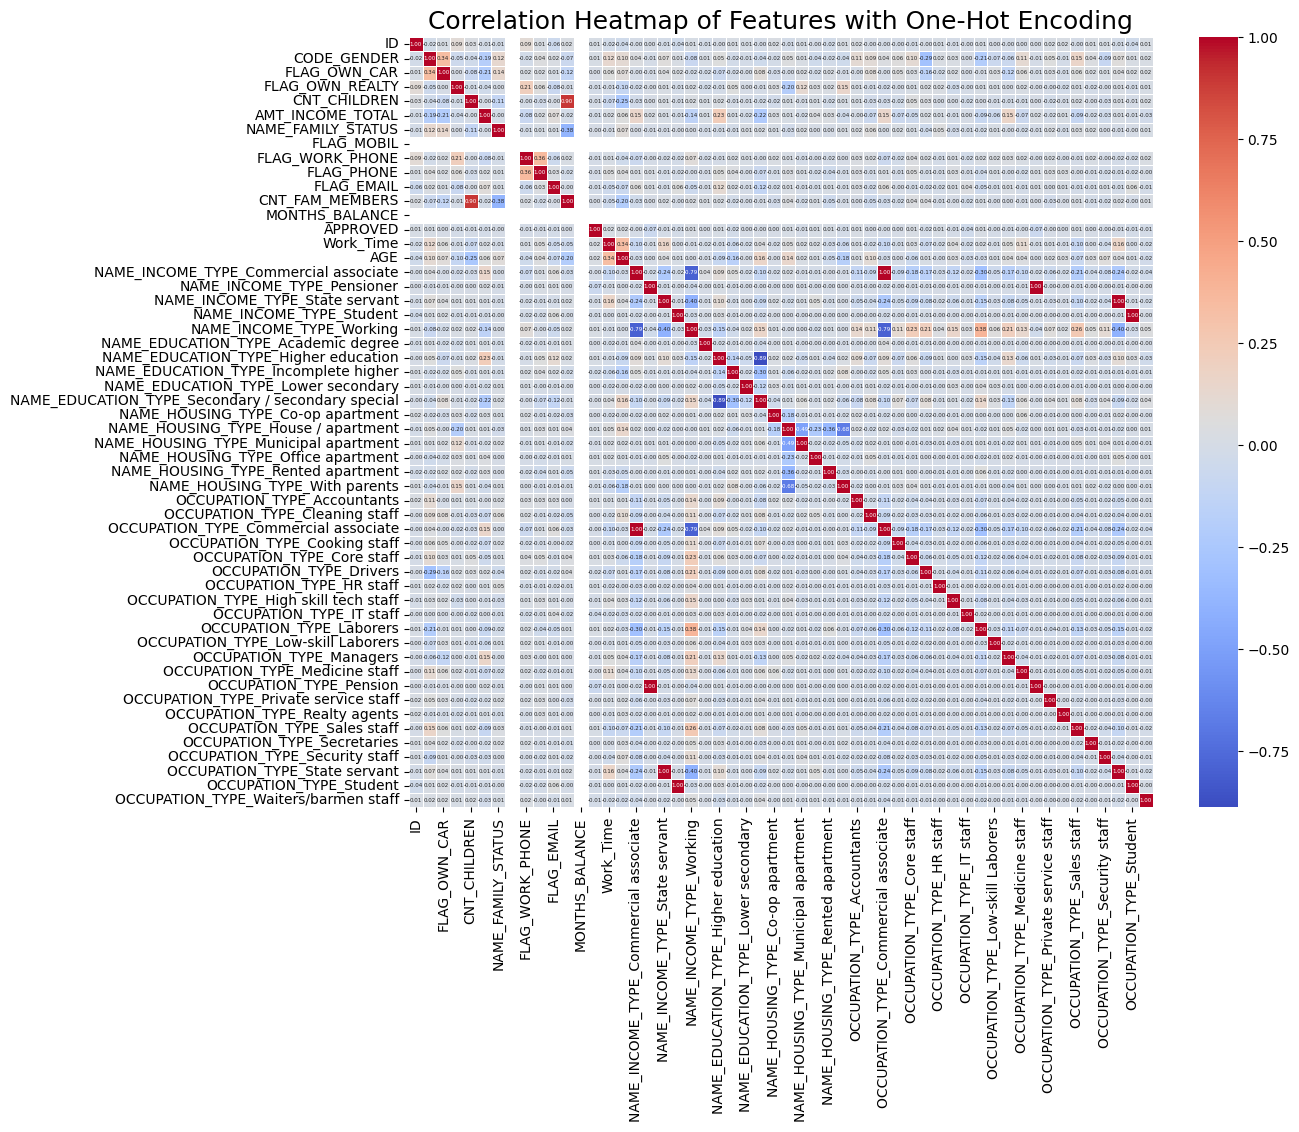

In [248]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_application_record.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5,annot_kws={"size": 4})
if onehot:
    title = 'Correlation Heatmap of Features with One-Hot Encoding'
else:
    title = 'Correlation Heatmap of Features with Label Encoding'
plt.title(title, fontsize=18)
plt.show()